# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
index_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/Index'
cr_lisp_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/credit.lisp'
cr_names_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/credit.names'
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
crx_names_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names'

In [25]:
columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']
df = pd.read_csv(data_url, na_values='?', header=None, names=columns)

In [26]:
print(df.shape)
df.head()

(690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [27]:
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null float64
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null int64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null float64
A15    690 non-null int64
A16    690 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.3+ KB


In [29]:
df[['A11', 'A15']] = df[['A11', 'A15']].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null float64
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null float64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null float64
A15    690 non-null float64
A16    690 non-null object
dtypes: float64(6), object(10)
memory usage: 86.3+ KB


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [30]:
pos_df = df[df['A16'] == '+']
neg_df = df[df['A16'] == '-']

In [31]:
pos_df.describe()

,A2,A3,A8,A11,A14,A15
count,305.000000,307.000000,307.000000,307.000000,301.000000,307.000000
mean,33.720492,5.904951,3.427899,4.605863,164.421927,2038.859935
std,12.809641,5.471485,4.120792,6.320242,161.770675,7659.763941
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.170000,1.500000,0.750000,0.000000,0.000000,0.000000
50%,30.500000,4.460000,2.000000,3.000000,120.000000,221.000000
75%,41.330000,9.520000,5.000000,7.000000,280.000000,1209.000000
max,76.750000,28.000000,28.500000,67.000000,840.000000,100000.000000


In [32]:
neg_df.describe()

,A2,A3,A8,A11,A14,A15
count,373.000000,383.000000,383.000000,383.000000,376.000000,383.000000
mean,29.808231,3.839948,1.257924,0.631854,199.699468,198.605744
std,10.919291,4.337662,2.120481,1.900049,181.564835,671.608839
min,15.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.835000,0.125000,0.000000,100.000000,0.000000
50%,27.330000,2.210000,0.415000,0.000000,167.500000,1.000000
75%,34.830000,5.000000,1.500000,0.000000,272.000000,67.000000
max,80.250000,26.335000,13.875000,20.000000,2000.000000,5552.000000


In [33]:
pos_df.describe(exclude='number')

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
count,304,303,303,303,303,307,307,307,307,307
unique,2,3,3,14,9,2,2,2,3,1
top,b,u,g,c,v,t,t,f,g,+
freq,206,256,256,62,169,284,209,161,287,307


In [34]:
neg_df.describe(exclude='number')

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
count,374,381,381,378,378,383,383,383,383,383
unique,2,2,2,14,9,2,2,2,3,1
top,b,u,g,c,v,f,f,f,g,-
freq,262,263,263,75,230,306,297,213,338,383


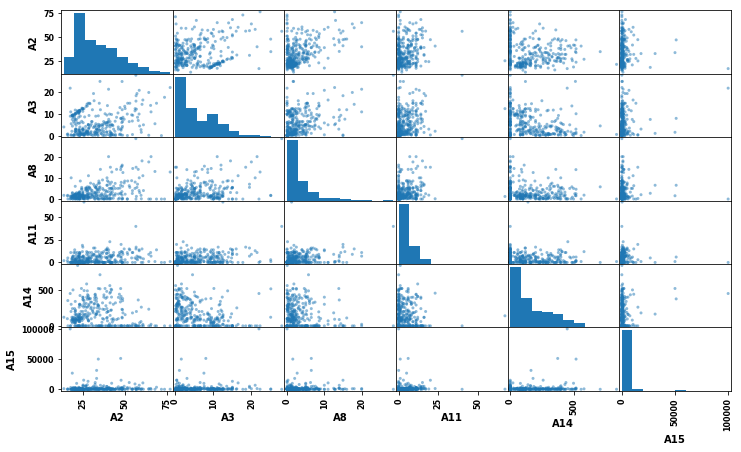

In [37]:
pd.plotting.scatter_matrix(pos_df, figsize=(12, 7));

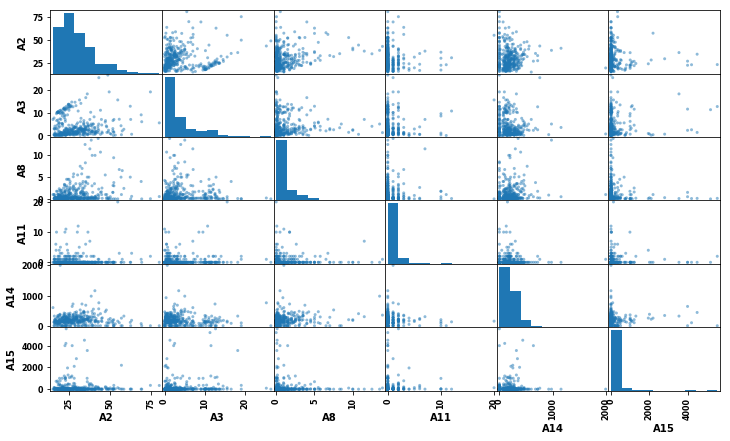

In [39]:
pd.plotting.scatter_matrix(neg_df, figsize=(12, 7));

In [61]:
pos_con = pos_df[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']]
neg_con = neg_df[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']]
cat_df = df[['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A16']]

In [55]:
pos_con.head()

,A2,A3,A8,A11,A14,A15
0,30.83,0.000,1.25,1.0,202.0,0.0
1,58.67,4.460,3.04,6.0,43.0,560.0
2,24.50,0.500,1.50,0.0,280.0,824.0
3,27.83,1.540,3.75,5.0,100.0,3.0
4,20.17,5.625,1.71,0.0,120.0,0.0


In [56]:
# feature that is extremely different between the classes
stats.ttest_ind(pos_con['A11'], neg_con['A11'], nan_policy='omit')

Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)

In [57]:
# feature that is less different between the classes, but still significant
stats.ttest_ind(pos_con['A14'], neg_con['A14'], nan_policy='omit')

Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)

In [62]:
cat_df.head()

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
0,b,u,g,w,v,t,t,f,g,+
1,a,u,g,q,h,t,t,f,g,+
2,a,u,g,q,h,t,f,f,g,+
3,b,u,g,w,v,t,t,t,g,+
4,b,u,g,w,v,t,f,f,s,+


### Chi-squared test returns an extreme result (rejecting the null that the data are independent)

In [74]:
table = pd.crosstab(cat_df['A16'], cat_df['A9'])
table

A9,f,t
A16,,
+,23,284
-,306,77


In [75]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(table)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 355.2038167412799
P-value: 3.1185900878457007e-79
Degrees of Freedom: 1
Expected: 
 [[146.38115942 160.61884058]
 [182.61884058 200.38115942]]


### Less extreme result, but still significant based on P-Value below 0.05

In [76]:
table2 = pd.crosstab(cat_df['A16'], cat_df['A5'])
table2

A5,g,gg,p
A16,,,
+,256,2,45
-,263,0,118


In [77]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(table2)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 26.234074966202144
P-value: 2.010680204180363e-06
Degrees of Freedom: 2
Expected: 
 [[229.90789474   0.88596491  72.20614035]
 [289.09210526   1.11403509  90.79385965]]


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

**Question 1**

- The first t-test was run on column A11. With a t-statistic of 11.667004222431277 and a p-value of 7.957718568079967e-29, we see an extreme difference between the two classes. The positive t-statistic show that the positive class has a higher mean than the negative class. Due to the low p-score, we reject the null-hypothesis that there is no difference between the mean of the two classes.

- The second t-test was run on column A14. With a t-statistic of -2.6358251986645476 and p-value of 0.008586135473979569, we see a less extreme difference between the two classes than the previous t-test. The negative t-statistic shows that the positive class had a lower mean than the negative class. Though this is a less extreme comparison, we still reject the null-hypothesis since the p-value below 0.05.

**Question2** 

- The first Chi-squared test was run on column A9. With Chi-Squared value of 355.2038167412799 and P-value of 3.1185900878457007e-79, we see an extreme difference between the two classes. The high Chi-Squared value and the low P-value show that there is a dependence between column A9 and the class labels, so we reject the null-hypothesis that the two columns are independent.

- The second Chi-squared test was run on column A5. With Chi-Squared value of 26.234074966202144 and P-value of 2.010680204180363e-06, we see a less extreme difference between the two classes. Since the P-value is below 0.05, we reject the null-hypothesis that the two columns are independent. 

**Question 3** 

- The most challenging part of the sprint challenge was actually reading in the data. I was unable to view any of the files on the UCI website, so I read in all the files to confirm which file(s) I needed. After I had read in all the files, I saw the slack message that the data file was the only one we needed. Everything else was very straight forward.